In [1]:
import pandas as pd 
import numpy as np
import prepare , explore
#to see the whole review, display max column width
pd.set_option('display.max_colwidth', None)

# Rate My Review
## An Analysis on Hotel reviews in Texas
#### Xavier Carter, September 2021

----

#### The Dataset
- Using Selinium, 13,800 reviews were gathered from various hotels across 4 major cities in Texas (Houston, Austin, Dallas, San Antonio)

#### Project Goals
- Analyze reviews to understand correlation to the review rating and the review. 
- Build a machine learning model to predict what rating a review should get.

#### Executive Summary
- Executive Summary here

----

## Acquire
- Utilizing Selinium (see acquire1.py and acquire2.py) , Gathering review information from TripAdvisor.com
- For sake of time, the max number of reviews looked at for each hotel was maxed to 35, as some hotels had hundreds of reviews

In [2]:
df = pd.read_csv('hotel_data.csv')

In [3]:
df.head(2)

,hotel_name,hotel_city,date_of_stay,review_rating,review
0,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,September 2021,5,Joseph was so helpful and attentive! Awesome customer service. Made our trip more enjoyable! This will now be our go to hotel when we come to San Antonio. Everything about the hotel was nice and the staff was very friendly. Very pleased with the whole experience.
1,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,September 2020,5,"We stayed one night at the Drury Plaza Riverwalk in mid-September. Sooo enjoyed our stay. Definitely our favorite hotel on the Riverwalk. We specifically stayed here for the rooms with the balconies overlooking the San Fernando Cathedral. I sat on that balcony all day long, reading and enjoying the view, even despite the day of rain! Love the separate bedroom! The afternoon happy hour could have easily sufficed for dinner had the allure of the Riverwalk restaurants not been there. The indoor pool/hot tub was nice, and the fitness center was perfectly equipped with great views while running the treadmill. The breakfast was hearty and very good quality...love that they have biscuits and gravy! Every employee we encountered was upbeat and kind and seemed to be interested in serving"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hotel_name     13801 non-null  object
 1   hotel_city     13801 non-null  object
 2   date_of_stay   13801 non-null  object
 3   review_rating  13801 non-null  int64 
 4   review         13801 non-null  object
dtypes: int64(1), object(4)
memory usage: 539.2+ KB


In [5]:
df.isna().sum()

hotel_name       0
hotel_city       0
date_of_stay     0
review_rating    0
review           0
dtype: int64

In [6]:
df.describe()

,review_rating
count,13801.000000
mean,3.622564
std,1.559053
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print('---------------------------')

La Cantera Resort & Spa                                    70
Fairmont Austin                                            70
The Westin Dallas Park Central                             35
La Quinta Inn & Suites by Wyndham Houston Galleria Area    35
Residence Inn Dallas Park Central                          35
                                                           ..
Kasa Dallas West End Apartments                             1
TownePlace Suites Austin Northwest / The Domain Area        1
Studio 6 Houston, TX- Intercontinental Airport South        1
Hilton Garden Inn Austin University Capitol District        1
Studio 6 Austin, TX-Airport                                 1
Name: hotel_name, Length: 548, dtype: int64
---------------------------
Austin         4033
San Antonio    3633
Houston        3574
Dallas         2561
Name: hotel_city, dtype: int64
---------------------------
 August 2021       1356
 July 2021         1215
 June 2021          696
 February 2020      696
 May 2021  

#### Acquire Findings 

#### TO-Do's:
1). The cap for reviews was 35, each review being unique, since value counts of 70 and 2 were seen, duplicates exist in the data. duplicates need to be removed.

2). Month and year can be in their own seperate columns.

3.) no null values or missing values. 

4.) Standardize english words using NLP processing, Standard cleaning using NLTK.

----

## Prepare
- In Preperation, we will
     * Drop Duplicates
     * Split month and year into seperate columns 
     * Drop date of stay column
     * Prep review content (Basic cleaning, tokenizing, lemmentizing, removing stop words, excluding common negative stop words)
     * Makeing columns for word and letter count
     * creating columns for negative , postive and neautral sentiment from cleaned version of the review (post clean, tokenize , lemmatized, and stop words removed, keeping popular negative stop words as negative stops words have the power to change the meaning of the review)
     * create bins for sentiment columns for exploration

In [8]:
df = prepare.prep_review_data(df)

In [9]:
df

,hotel_name,hotel_city,review_rating,review,month_of_stay,year_of_stay,review_cleaned,message_length,word_count,positive_sentiment,negative_sentiment,neatral_sentiment
0,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,5,Joseph was so helpful and attentive! Awesome customer service. Made our trip more enjoyable! This will now be our go to hotel when we come to San Antonio. Everything about the hotel was nice and the staff was very friendly. Very pleased with the whole experience.,September,2021,joseph helpful attentive ! awesome customer service. made trip enjoyable ! go hotel come san antonio. everything hotel nice staff friendly. pleased whole experience .,166,25,0.547,0.000,0.453
1,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,5,"We stayed one night at the Drury Plaza Riverwalk in mid-September. Sooo enjoyed our stay. Definitely our favorite hotel on the Riverwalk. We specifically stayed here for the rooms with the balconies overlooking the San Fernando Cathedral. I sat on that balcony all day long, reading and enjoying the view, even despite the day of rain! Love the separate bedroom! The afternoon happy hour could have easily sufficed for dinner had the allure of the Riverwalk restaurants not been there. The indoor pool/hot tub was nice, and the fitness center was perfectly equipped with great views while running the treadmill. The breakfast was hearty and very good quality...love that they have biscuits and gravy! Every employee we encountered was upbeat and kind and seemed to be interested in serving",September,2020,"stayed one night drury plaza riverwalk mid-september. sooo enjoyed stay. definitely favorite hotel riverwalk. specifically stayed room balcony overlooking san fernando cathedral. sat balcony day long , reading enjoying view , even despite day rain ! love separate bedroom ! afternoon happy hour could easily sufficed dinner allure riverwalk restaurant not there. indoor pool/hot tub nice , fitness center perfectly equipped great view running treadmill. breakfast hearty good qualitylove biscuit gravy ! every employee encountered upbeat kind seemed interested serving",568,80,0.396,0.032,0.572
2,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,5,"On a very busy weekend, I had the pleasure of experiencing, Excellent customer service and very friendly Felt I made the right choice staying here Johnny and ZOE made me feel special And they were busy",September,2021,"busy weekend , pleasure experiencing , excellent customer service friendly felt made right choice staying johnny zoe made feel special busy",139,21,0.470,0.000,0.530
3,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,5,Elijah has great customer service! He was very helpful and definitely made us feel that our vehicle is in safe hands! Elijah is also extremely informative and answered every question very detailed. Thank u Elijah !,September,2021,elijah ha great customer service ! helpful definitely made u feel vehicle safe hand ! elijah also extremely informative answered every question detailed. thank u elijah !,170,27,0.589,0.000,0.411
4,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,5,Excellent place to stay. Everyone was pleasant to deal with. Our room was exceptionally clean and comfortable. The free breakfast was phenomenal. The staff worked so hard at keeping everything cleaned and sanitized. The history behind the Drury Plaza being the old Alamo Bank is an added touch with the decor in the lobby. Very nostalgic.,August,2021,excellent place stay. everyone pleasant deal with. room exceptionally clean comfortable. free breakfast phenomenal. staff worked hard keeping everything cleaned sanitized. history behind drury plaza old alamo bank added touch decor lobby. nostalgic .,250,34,0.400,0.031,0.570
...,...,...,...,...,...,...,...,...,...,...,...,...
13796,Bestway Inn,Dallas,1,"Where to start? No ice, no vending or coke machines, smoke detector unplugged, furniture dirty, blow dryer doesn't work (found out after I wet my hair), bathtu

----

## Outliers 
- Here , we'll take a look at possible anomolies
     * looking at positive sentiment reviews with low ratings
     * looking at negative sentiment reviews with high ratings

In [10]:
postive_when_neg  = (df.positive_sentiment  >= .450) & (df.review_rating == 1)
negative_when_pos = (df.negative_sentiment  >= .450) & (df.review_rating == 5)

In [11]:
df[postive_when_neg]

,hotel_name,hotel_city,review_rating,review,month_of_stay,year_of_stay,review_cleaned,message_length,word_count,positive_sentiment,negative_sentiment,neatral_sentiment
542,Hyatt Place San Antonio/Riverwalk,San Antonio,1,The staff was very friendly and professional. The rooms were clean. Breakfast choices were good. Staying on the Riverwalk was so nice. Everyone was able to enjoy the restaurants and entertainment. Our basketball team families really had a great time. The room rates were affordable.,July,2021,staff friendly professional. room clean. breakfast choice good. staying riverwalk nice. everyone able enjoy restaurant entertainment. basketball team family really great time. room rate affordable .,198,26,0.550,0.000,0.450
550,Hyatt Place San Antonio/Riverwalk,San Antonio,1,"It was a short stay for us, but everything ran smoothly and efficient even though the hotel looked full. It was clean and staff appeared willing to help. Great place to stay. We will definitely go back.",July,2021,"short stay u , everything ran smoothly efficient even though hotel looked full. clean staff appeared willing help. great place stay. definitely go back .",153,25,0.469,0.000,0.531
2740,Sheraton Dallas Hotel,Dallas,1,"I visited the Dallas Sheraton to see a friend and had s great experience with the valet, Will, who was polite snd helpful with suggestions about where we could eat or drink around Dallas. Great service beyond the norm. Thanks Will! I hope to see you again at the Sheraton.",August,2021,"visited dallas sheraton see friend great experience valet , , polite snd helpful suggestion could eat drink around dallas. great service beyond norm. thanks ! hope see sheraton .",178,29,0.516,0.000,0.484
2857,W Dallas - Victory,Dallas,1,I knew that covid would affect some services at the hotel but not everything. This was my worst stay at a W Hotel ever. The hotel's motto Whenever/Whatever should be JustNever. The only pleasant experience was seeing Spenser daily with his great smile and kind heart. He was an excellent driver and so helpful.,May,2021,knew covid would affect service hotel not everything. worst stay w hotel ever. hotel ' motto whenever/whatever justnever. pleasant experience seeing spenser daily great smile kind heart. excellent driver helpful .,213,31,0.524,0.000,0.476
5125,Comfort Suites NW Lakeline,Austin,1,"All around good place to stay whatever you reason for travel to Austin, easy access to major roads that take you all around town and back to your comfortable room. Nice breakfast and competent staff that is responsive to your needs.",March,2019,"around good place stay whatever reason travel austin , easy access major road take around town back comfortable room. nice breakfast competent staff responsive need .",166,26,0.481,0.000,0.519
5870,Hyatt Place Dallas-North/By The Galleria,Dallas,1,"Loved it here ! And I would definitely travel here again. For the price I paid it was amazing given its during a ""pandemic"" the staff was very nice and everyone had their masks on ! I also booked online with priceline",October,2020,"loved ! would definitely travel again. price paid amazing given "" pandemic "" staff nice everyone mask ! also booked online priceline",132,22,0.496,0.000,0.504
5988,Hampton Inn & Suites Houston I-10 West Park Row,Houston,1,"I have been a loyal customer of Hilton, across all hotels, Hampton is my favorite. I have tried some other hotels, but I will keep coming back. I don't feel like I am being treated like number. Thank you for all that you do",October,2019,"loyal customer hilton , across hotel , hampton favorite. tried hotel , keep coming back. ' feel like treated like number. thank",127,22,0.554,0.000,0.446
6163,"The Sam Houston, Curio Collection by Hilton",Houston,1,"We have stayed here many times and love to come back. We decided to stay for loyalty, points and the great breakfast that comes with Diamond status. When we arrived, we were informed that they no longer give Diamond Status privileges! Do your

In [12]:
df[negative_when_pos]

,hotel_name,hotel_city,review_rating,review,month_of_stay,year_of_stay,review_cleaned,message_length,word_count,positive_sentiment,negative_sentiment,neatral_sentiment
13793,Econo Lodge Inn & Suites,Dallas,5,"Service of staff was a little bad and rude, In the lobby the didn't have the uniform. And the location is not good, is very dangerous.",March,2014,"service staff little bad rude , lobby ' uniform. location not good , dangerous .",80,15,0.141,0.526,0.332


#### Most of these may be miss clicked, as these people may wanted to rate higher or lower then their sentiment may suggest. so we will remove these from the dataframe as outliers so our model isnt trained in a way that might skew the results.

In [13]:
df = prepare.remove_outliers(df)

In [14]:
len(df)

13717

### Split Model 

In [15]:
train, validate, test = prepare.split_for_model(df,'review_rating')

(7681, 12),(3292, 12),(2744, 12)


## Explore

### univariate 

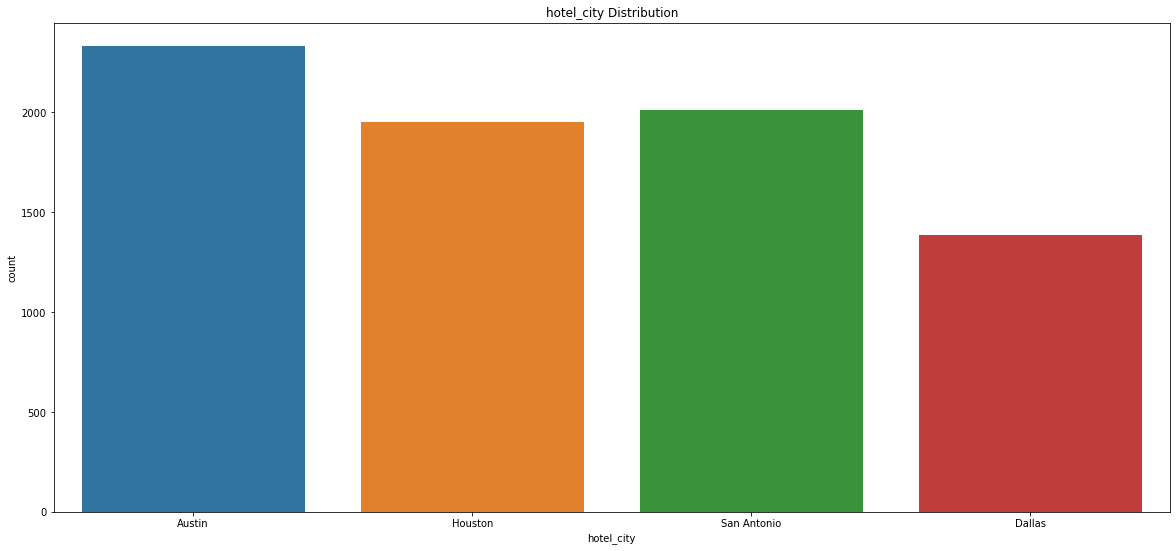

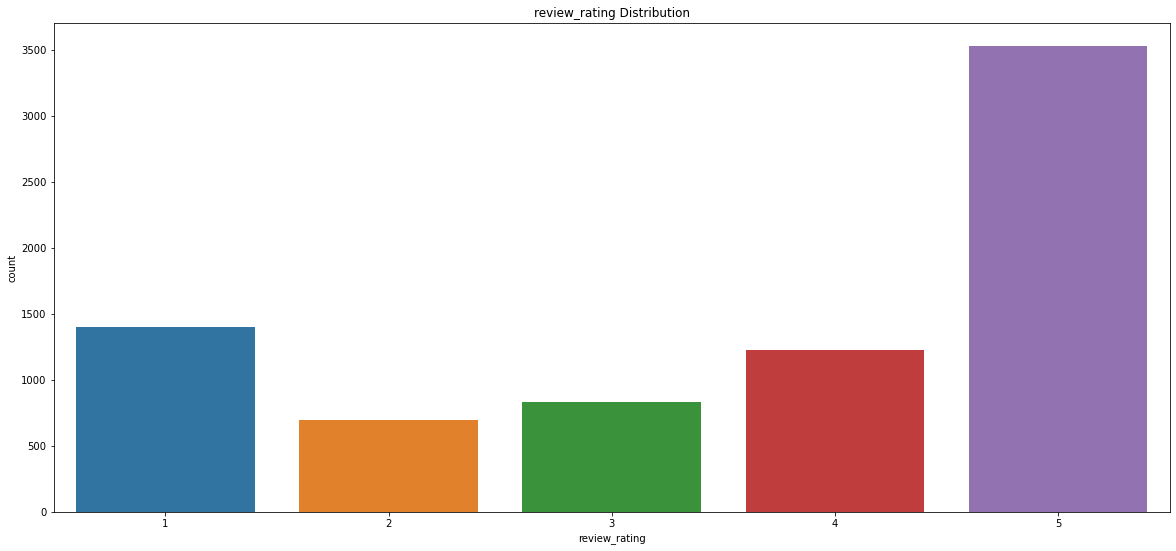

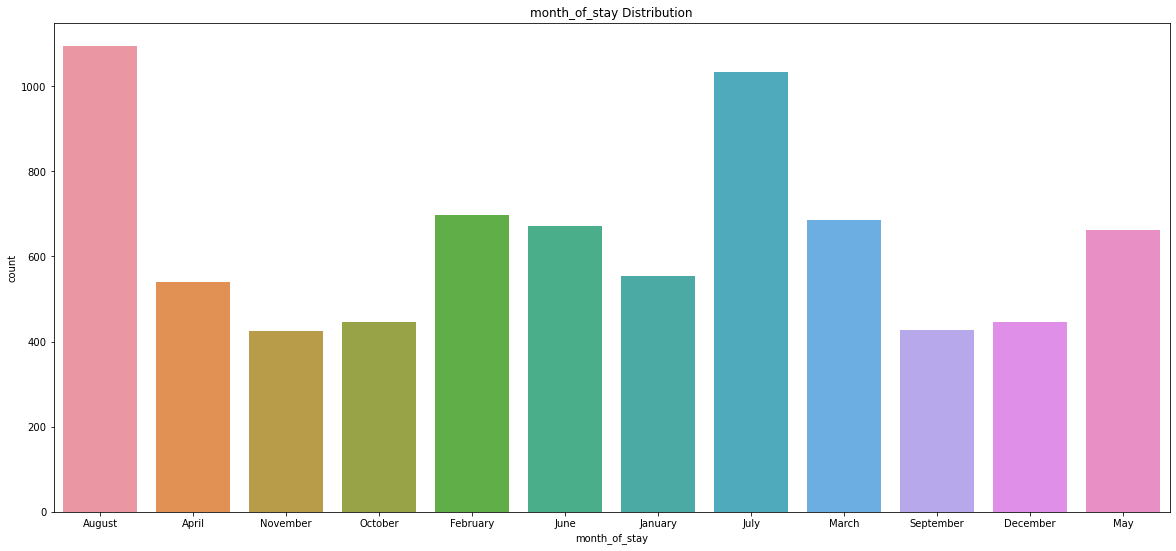

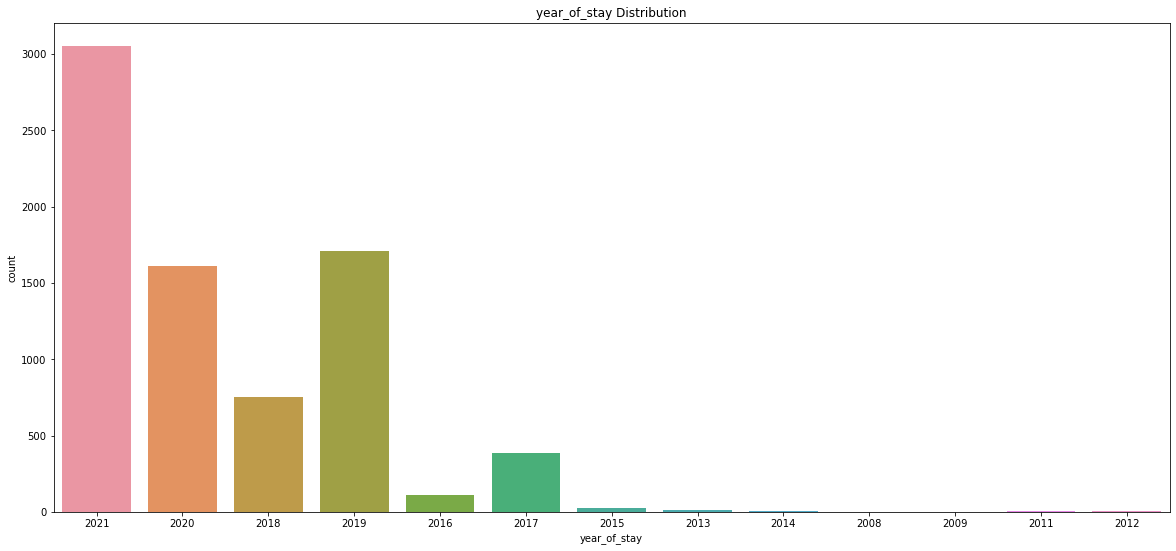

In [25]:
explore.get_distribution(train.drop(columns=['hotel_name','review', 'review_cleaned','positive_sentiment','negative_sentiment', 'neatral_sentiment','message_length', 'word_count']))

### Bivariate

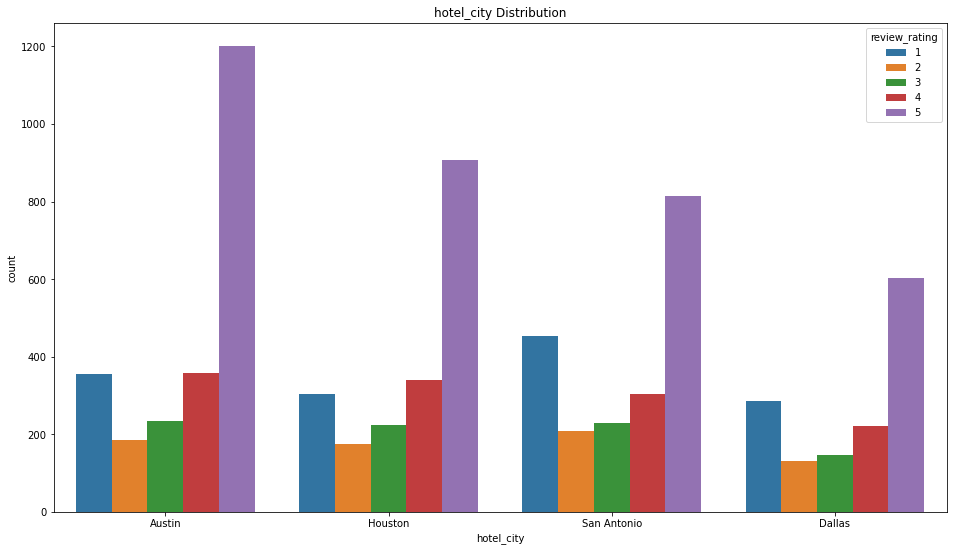

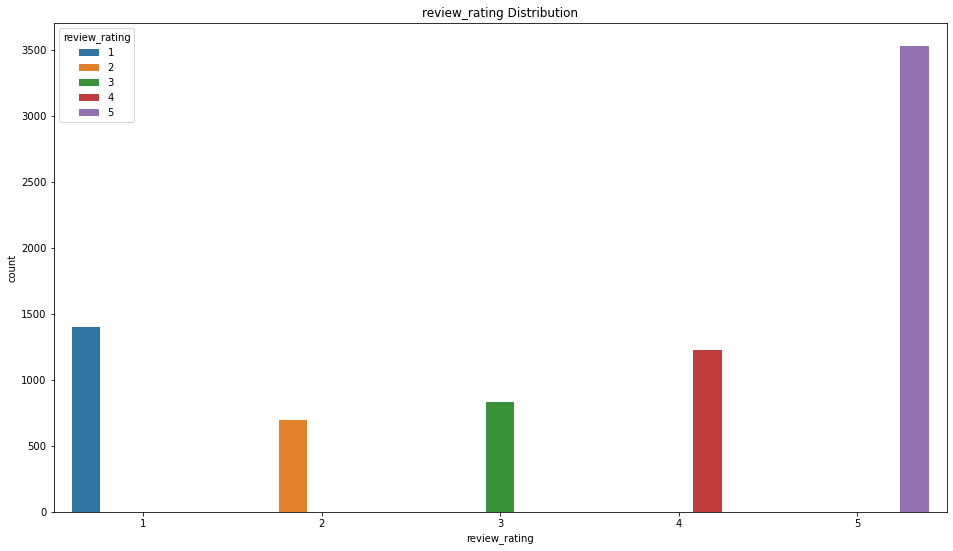

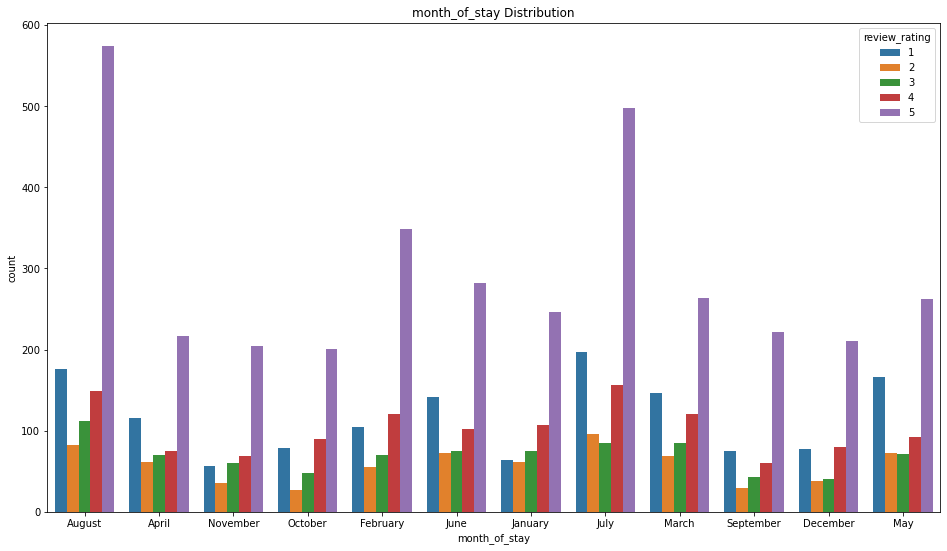

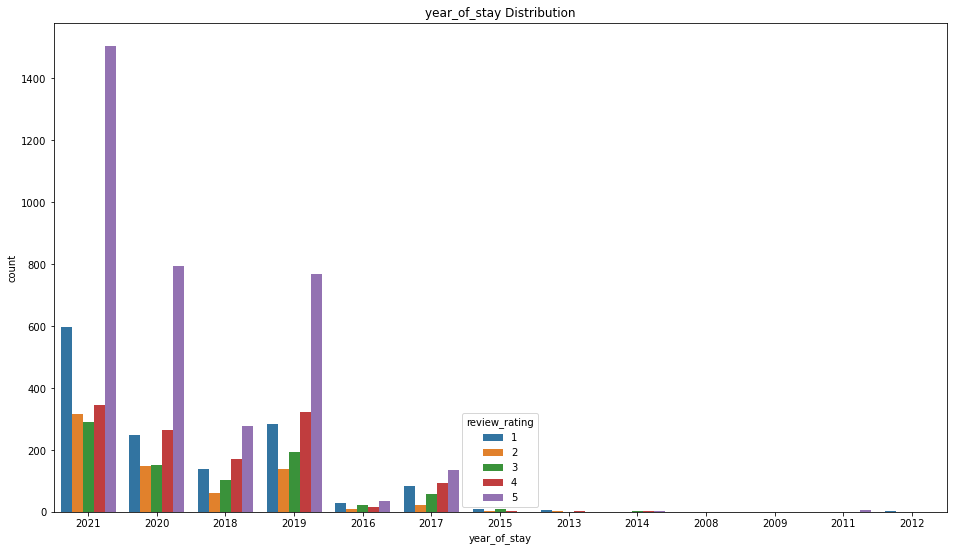

In [26]:
explore.compare_to_target(train.drop(columns=['hotel_name','review', 'review_cleaned','positive_sentiment','negative_sentiment', 'neatral_sentiment','word_count', 'message_length']), 'review_rating')

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

### Does word count and message length differ for different review ratings?

<AxesSubplot:xlabel='message_length', ylabel='word_count'>

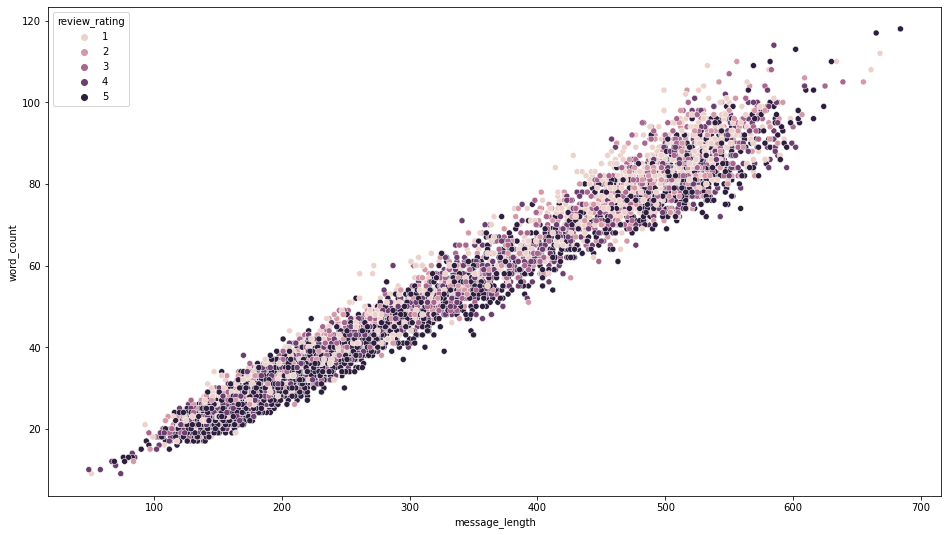

In [52]:
plt.figure(figsize=(16,9))
sns.scatterplot(data = train, x = 'message_length', y ='word_count', hue='review_rating')

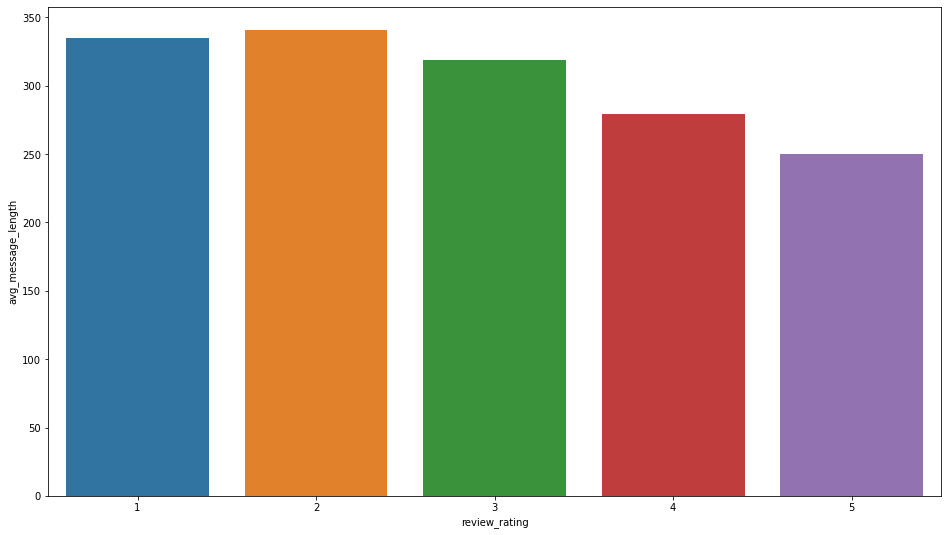

In [77]:
plt.figure(figsize=(16,9))
group = train.groupby(['review_rating']).agg(avg_message_length =("message_length", 'mean'))
group = group.reset_index()
sns.barplot(data=group, x = 'review_rating', y = 'avg_message_length')
plt.show()

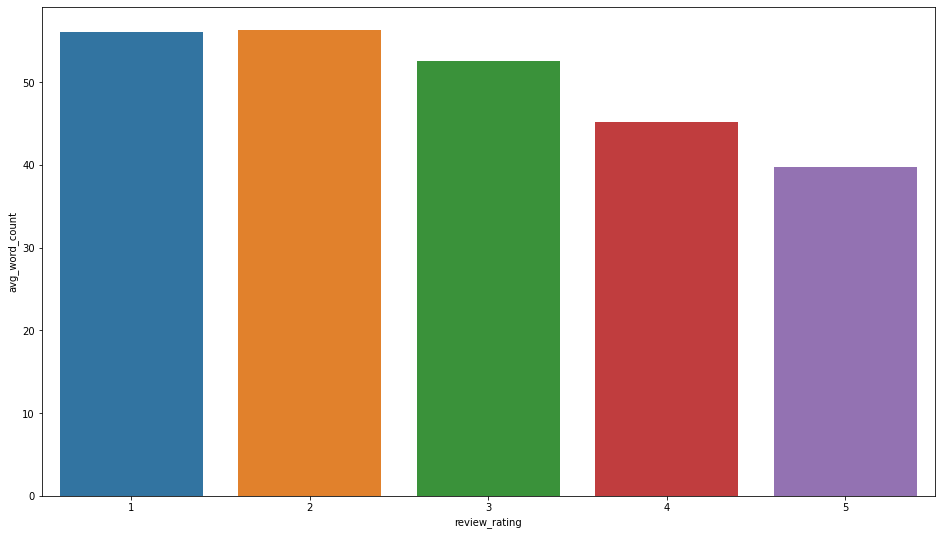

In [78]:
plt.figure(figsize=(16,9))
group = train.groupby(['review_rating']).agg(avg_word_count =("word_count", 'mean'))
group = group.reset_index()
sns.barplot(data=group, x = 'review_rating', y = 'avg_word_count')
plt.show()